In [ ]:
import pandas as pd
import datetime
import time
import requests
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from google.colab import files

In [ ]:
# Load the dataset
df = pd.read_csv("mcdonalds_comments_2024_2025.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post Title  5253 non-null   object
 1   Comment     5253 non-null   object
 2   Upvotes     5253 non-null   int64 
 3   Timestamp   5253 non-null   object
dtypes: int64(1), object(3)
memory usage: 164.3+ KB


#Data Cleaning and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post Title  5253 non-null   object
 1   Comment     5253 non-null   object
 2   Upvotes     5253 non-null   int64 
 3   Timestamp   5253 non-null   object
dtypes: int64(1), object(3)
memory usage: 164.3+ KB


In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

# Define stopwords
custom_stopwords = set([
    'mcdonald', 'mcdonalds', 's', 't', 'm', 'don',
    'wa', 'ha', 'im', 'go', 'got', 'get', 'make', 'going', 'will', 'would',
    'thing', 'time', 'day', 'year', 'now', 'one',
    'they', 'them', 'you', 'me', 'my', 'their', 'theyre',
    'used', 'use', 'even', 'much', 'still', 'way',
    'good', 'better', 'bad',
    'dont', 'didnt', 'cant', 'doesnt', 'thats',
    'back', 'today', 'really', 'actually', 'always',
    'something', 'every', 'everything', 'went',
    'order', 'ordered', 'pretty', 'nice', 'lol',
    'want', 'know', 'think', 'people', 'work', 'new', 'see',
    'never', 'ive', 'well', 'need', 'yeah', 'u'
])
lemmatizer = WordNetLemmatizer()


df.dropna(subset=["Comment"], inplace=True)
df = df[df["Comment"].astype(str).str.strip().replace(r'\s+', '', regex=True) != ""]

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


df.drop_duplicates(subset=["Comment"], inplace=True)


df = df.reset_index(drop=True)


def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["Comment"] = df["Comment"].astype(str).apply(clean_text)


df["Tokenized_Comment"] = df["Comment"].apply(
    lambda x: " ".join([
        lemmatizer.lemmatize(word)
        for word in x.split()
        if lemmatizer.lemmatize(word) not in custom_stopwords
    ])
)

df = df[df["Comment"].astype(str).str.strip().replace(r'\s+', '', regex=True) != ""]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Post Title         5233 non-null   object        
 1   Comment            5233 non-null   object        
 2   Upvotes            5233 non-null   int64         
 3   Timestamp          5233 non-null   datetime64[ns]
 4   Tokenized_Comment  5233 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 204.5+ KB


In [ ]:
# Count rows where 'Tokenized_Comment' is missing (NaN) or empty (only spaces)
blank_count = df["Tokenized_Comment"].isna().sum() + (df["Tokenized_Comment"].astype(str).str.strip() == "").sum()

print(f"Number of blank cells in 'Tokenized_Comment': {blank_count}")

Number of blank cells in 'Tokenized_Comment': 9


In [ ]:
df = df[df["Tokenized_Comment"].astype(str).str.strip() != ""]
df = df.dropna(subset=["Tokenized_Comment"])
print(f"Remaining rows: {len(df)}")

Remaining rows: 5224


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5224 entries, 0 to 5232
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Post Title         5224 non-null   object        
 1   Comment            5224 non-null   object        
 2   Upvotes            5224 non-null   int64         
 3   Timestamp          5224 non-null   datetime64[ns]
 4   Tokenized_Comment  5224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 244.9+ KB


In [ ]:
remaining = []

for word in custom_stopwords:
    if df["Tokenized_Comment"].str.contains(rf"\b{word}\b", regex=True).any():
        remaining.append(word)

print("Stopwords still present:", remaining)


Stopwords still present: []


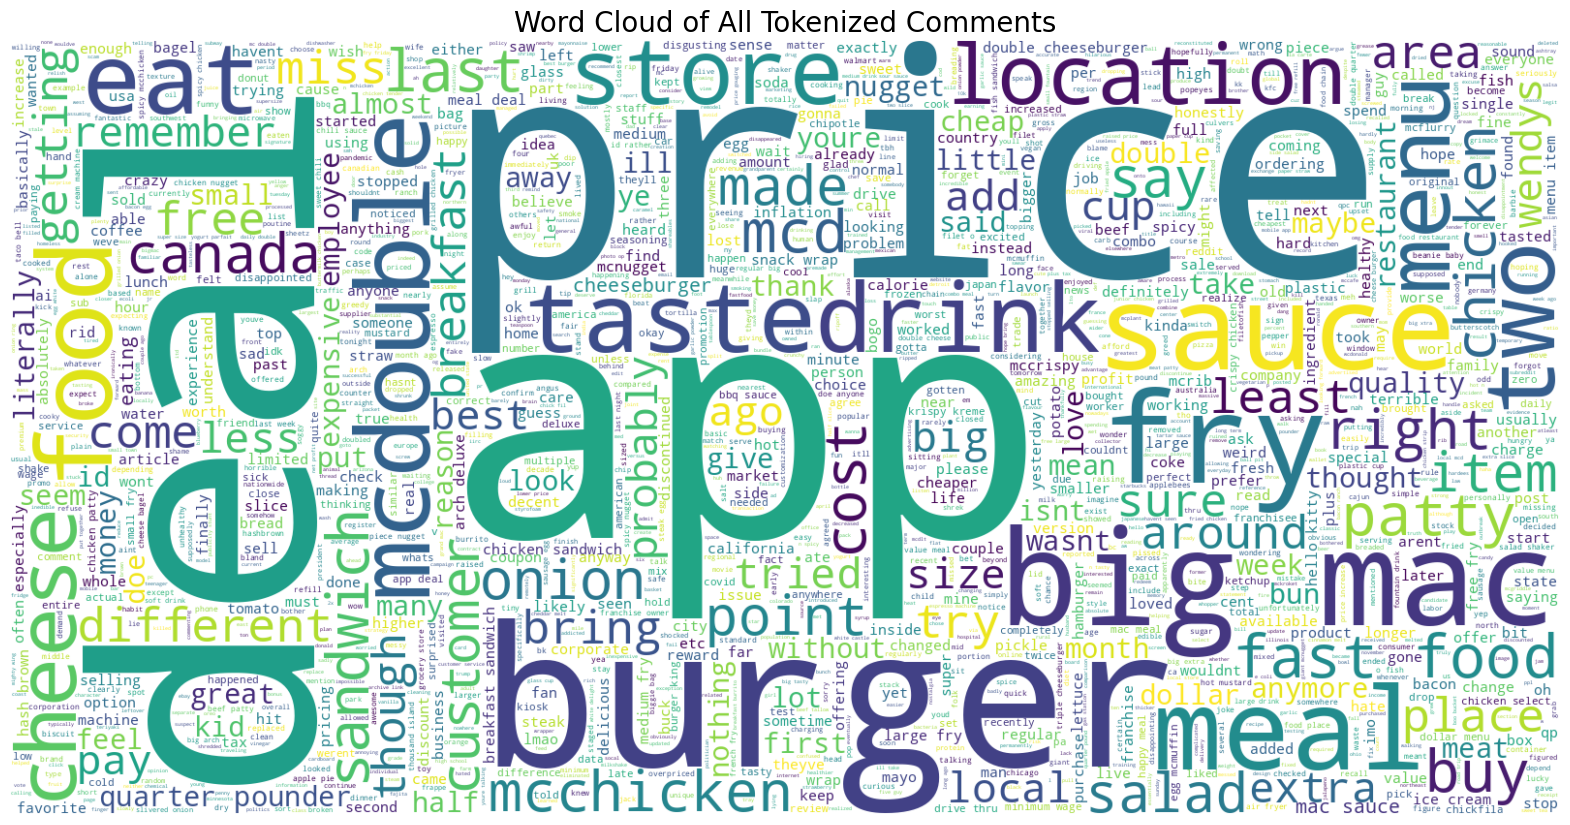

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


all_text = " ".join(df["Tokenized_Comment"])


plt.figure(figsize=(20, 20))
wc = WordCloud(
    background_color='white',
    max_words=2000,
    width=1600,
    height=800
).generate(all_text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Tokenized Comments", fontsize=20)
plt.show()

In [ ]:
# Select only wanted rows
df_filtered = df[["Timestamp","Comment","Tokenized_Comment"]]
df_filtered.head()

,Timestamp,Comment,Tokenized_Comment
0,2024-10-22 22:39:00,update e coli outbreak linked to mcdonalds qua...,update e coli outbreak linked to quarter pound...
1,2024-10-23 02:47:00,i just had it 3 hrs ago in northeast in app i ...,i just had it 3 hr ago in northeast in app i s...
2,2024-10-22 23:31:00,so many food outbreaks lately,so many food outbreak lately
3,2024-10-24 05:48:00,my husband was in the er yesterday likely from...,husband in the er yesterday likely from e coli...
4,2024-10-23 00:29:00,i ate a quarter pounder today while scrolling ...,i ate a quarter pounder while scrolling reddit...


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5224 entries, 0 to 5232
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          5224 non-null   datetime64[ns]
 1   Comment            5224 non-null   object        
 2   Tokenized_Comment  5224 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 163.2+ KB


In [ ]:
df_filtered.to_csv("filtered_data.csv", index=False)
files.download("filtered_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>